<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Teste_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Bibliotecas:

import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import scipy.interpolate as interp
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.optimize import curve_fit

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

In [42]:
import pyccl as ccl

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt


Optimized hyperparameters:
theta = [0.66685457 2.0949801 ]


<ipython-input-4-36dd37cae0b1>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')


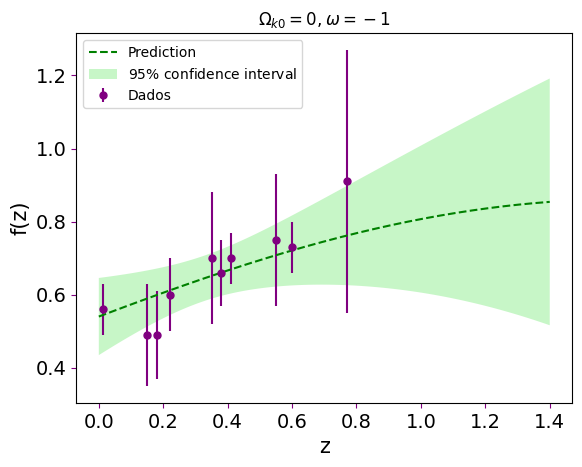

In [4]:
# TESTE 0: TIREI O ÚLTIMO PONTO

f_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91])
f_erro = np.array([0.07, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36])
z_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77])

# nomeando
x_gapp = z_dados
y_gapp = f_dados
e = f_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_gapp, y_gapp, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x_gapp, y_gapp, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.6766881  1.82610053]


<ipython-input-5-445881234e71>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x1_gapp, y1_gapp, e1, fmt='r.', color='purple', markersize=10, label='Dados')


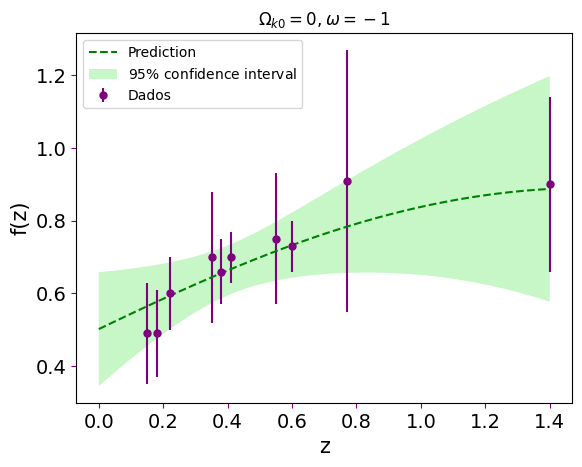

In [5]:
# TESTE 1: TIREI O PRIMEIRO PONTO

f1_dados = np.array([0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f1_erro = np.array([0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36, 0.24])
z1_dados = np.array([0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

# nomeando
x1_gapp = z1_dados
y1_gapp = f1_dados
e1 = f1_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x1_gapp, y1_gapp, e1, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec1, theta) = g.gp(theta=initheta)

xi1 = rec1[:, 0]

y_pred1 = rec1[:, 1]
sigma1  = rec1[:, 2]

y_pred_95_less = y_pred1 - 1.9600*sigma1
y_pred_95_plus = y_pred1 + 1.9600*sigma1

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x1_gapp, y1_gapp, e1, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi1, y_pred1, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi1, xi1[::-1]]),
         np.concatenate([y_pred1 - 1.9600 * sigma1,
                        (y_pred1 + 1.9600 * sigma1)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.69829826 2.55648477]


<ipython-input-6-dc3ff681dbab>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x2_gapp, y2_gapp, e2, fmt='r.', color='purple', markersize=10, label='Dados')


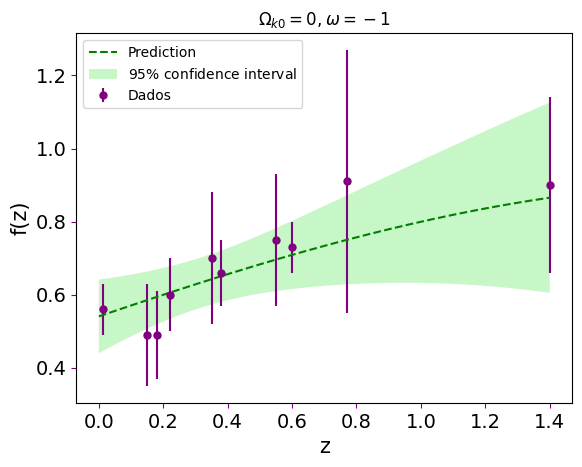

In [6]:
# TESTE 2: TIREI O SEXTO PONTO

f2_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.75, 0.73, 0.91, 0.90])
f2_erro = np.array([0.07, 0.14, 0.12, 0.10, 0.18, 0.09, 0.18, 0.07, 0.36, 0.24])
z2_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.55, 0.60, 0.77, 1.40])

# nomeando
x2_gapp = z2_dados
y2_gapp = f2_dados
e2 = f2_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x2_gapp, y2_gapp, e2, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec2, theta) = g.gp(theta=initheta)

xi2 = rec2[:, 0]

y_pred2 = rec2[:, 1]
sigma2  = rec2[:, 2]

y_pred_95_less = y_pred2 - 1.9600*sigma2
y_pred_95_plus = y_pred2 + 1.9600*sigma2

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x2_gapp, y2_gapp, e2, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi2, y_pred2, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi2, xi2[::-1]]),
         np.concatenate([y_pred2 - 1.9600 * sigma2,
                        (y_pred2 + 1.9600 * sigma2)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()


Optimized hyperparameters:
theta = [0.70379866 1.51469563]


<ipython-input-50-6a1b92794350>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x3_gapp, y3_gapp, e3, fmt='r.', color='purple', markersize=10, label='Dados')


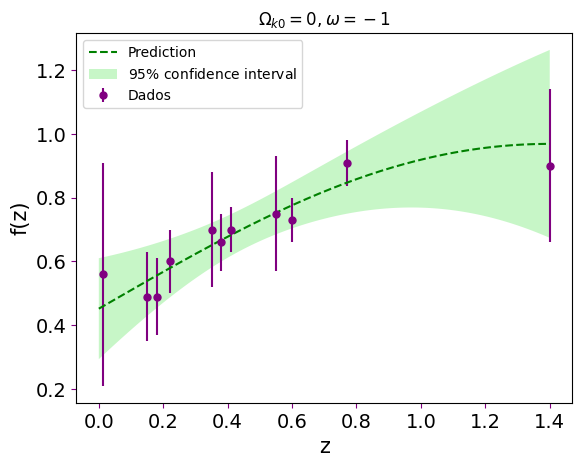

In [50]:
# TESTE 3: MEXER NAS BARRAS DE ERRO

f3_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f3_erro = np.array([0.07*5, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36*(1/5), 0.24])
z3_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

# nomeando
x3_gapp = z3_dados
y3_gapp = f3_dados
e3 = f3_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x3_gapp, y3_gapp, e3, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec3, theta) = g.gp(theta=initheta)

xi3 = rec3[:, 0]

y_pred3 = rec3[:, 1]
sigma3  = rec3[:, 2]

y_pred_95_less = y_pred3 - 1.9600*sigma3
y_pred_95_plus = y_pred3 + 1.9600*sigma3

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.errorbar(x3_gapp, y3_gapp, e3, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi3, y_pred3, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi3, xi3[::-1]]),
         np.concatenate([y_pred3 - 1.9600 * sigma3,
                        (y_pred3 + 1.9600 * sigma3)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('f(z)', fontsize=15)
plt.legend(loc='best')
plt.title('$\Omega_{k0} = 0, \omega = -1$')
plt.show()

# salvando os dados reconstruídos

dH = xi, y_pred, sigma
np.savetxt('fz_recon_teste3.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("fz_recon_teste3.dat")


Optimized hyperparameters:
theta = [0.70382925 1.5148469 ]


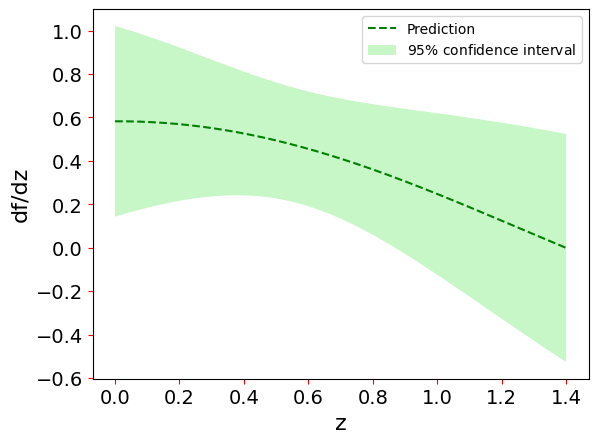

In [52]:
from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# TESTE 3: MEXER NAS BARRAS DE ERRO

f3_dados = np.array([0.56, 0.49, 0.49, 0.60, 0.70, 0.66, 0.70, 0.75, 0.73, 0.91, 0.90])
f3_erro = np.array([0.07*5, 0.14, 0.12, 0.10, 0.18, 0.09, 0.07, 0.18, 0.07, 0.36*(1/5), 0.24])
z3_dados = np.array([0.013, 0.15, 0.18, 0.22, 0.35, 0.38, 0.41, 0.55, 0.60, 0.77, 1.40])

# nomeando
x3_gapp = z3_dados
y3_gapp = f3_dados
e3 = f3_erro

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x3_gapp, y3_gapp, e3, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(thetatrain=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma


# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14,color='red')
plt.plot(xi, y_pred, color='green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('df/dz', fontsize=16)
plt.legend(loc='best')
plt.show()


# salvando os dados reconstruídos

dH = xi, y_pred, sigma
np.savetxt('dfz_recon_teste3.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dfz_recon_teste3.dat")

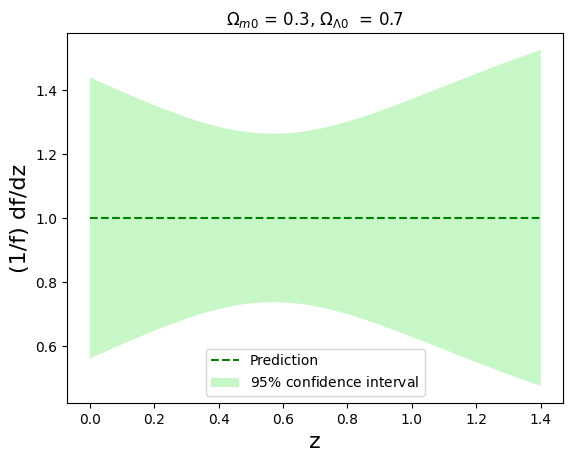

In [54]:
# baixando e nomeando dados
fz = np.genfromtxt('/content/fz_recon_teste3.dat', delimiter='\t')

z_dgapp = fz[:, 0]
f_dgapp = fz[:, 1]

ef = fz[:, 2]

dfz = np.genfromtxt('/content/dfz_recon_teste3.dat', delimiter='\t')

df = dfz[:, 1]

edf = dfz[:, 2]

df_f = df / f_dgapp

sigma_ff = np.sqrt(((df_f) ** 2) * (((ef / f_dgapp) ** 2) + ((edf / df) ** 2)))



# PLOTE
plt.plot(z_dgapp, df_f, color='green', label='Prediction', linestyle="--")
#plt.plot(zi, derivada_teo, label='Derivada teórica', color='red')
plt.fill(np.concatenate([z_dgapp, z_dgapp[::-1]]),
         np.concatenate([df_f - 1.9600 * sigma,
                        (df_f + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.title('$\Omega_{m0}$ = 0.3, $\Omega_{\Lambda 0}$  = 0.7 ')
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/f) df/dz', fontsize=16)
plt.legend(loc='best')
plt.show()

H = xi, y_pred, sigma_ff
np.savetxt('df_f_recon_1.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("df_f_recon_1.dat")


Optimized hyperparameters:
theta = [134.94426242   1.98775665]


<ipython-input-56-b7b03295b68f>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x_h, y_h, e, fmt='r.', color='purple', markersize=10, label='Dados')


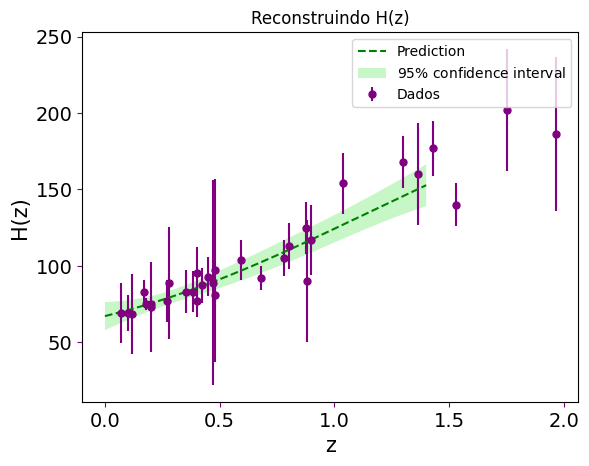

In [56]:
# baixando os dados
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/Dados/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = gp.GaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(rec, theta) = g.gp(theta=initheta)

xi = rec[:, 0]

y_pred = rec[:, 1]
sigma  = rec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma

# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
#plt.plot(z, h_1, color='red', label='$\Lambda$CDM')
plt.errorbar(x_h, y_h, e, fmt='r.', color='purple', markersize=10, label='Dados')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('H(z)', fontsize=15)
plt.legend(loc='best')
plt.title('Reconstruindo H(z)')
plt.show()



# salvando os dados reconstruídos

H = xi, y_pred, sigma
np.savetxt('hz_recon.dat', np.transpose(H), delimiter='\t')
#from google.colab import files
#files.download("hz_recon.dat")


Optimized hyperparameters:
theta = [134.94426242   1.98775665]


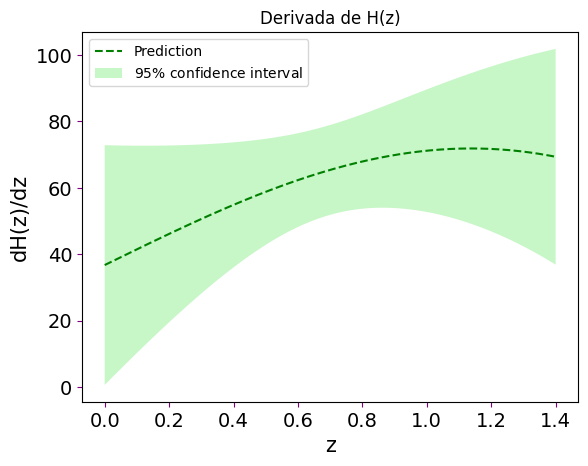

In [57]:
from gapp import dgp # dgp calcula a primeira, segunda e terceira derivada

# baixando os dados reconstruídos de H
data_h = np.genfromtxt('/content/drive/MyDrive/Doutorado/Dados/CC_Hz_data.csv', delimiter=', ')

z_h = data_h[:, 0]

h = data_h[:, 1]

sig_h = data_h[:, 2]

# nomeando
x_h = z_h
y_h = h
e = sig_h

# xmin, xmax and nstar are interpreted as two-dimensional vectors
xmin = 0
xmax = 1.4
nstar = 1000

# initial values of the hyperparameters of the squared-exponential covariance function
initheta = [2.0, 2.0]

# initialization of the Gaussian Process
g = dgp.DGaussianProcess(x_h, y_h, e, cXstar=(xmin, xmax, nstar))

# training of the hyperparameters and reconstruction of the function
(drec, theta) = g.dgp(theta=initheta)

# the second and third derivatives use g.d2gp() and g.d3gp()

xi     = drec[:, 0]
y_pred = drec[:, 1]
sigma  = drec[:, 2]

y_pred_95_less = y_pred - 1.9600*sigma
y_pred_95_plus = y_pred + 1.9600*sigma


# Plot the function, the prediction and the 95% confidence interval
plt.figure()
plt.tick_params(labelsize=14, color='purple')
plt.plot(xi, y_pred, color = 'green', label='Prediction', linestyle="--")
plt.fill(np.concatenate([xi, xi[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, color = 'lightgreen', ec='None', label=r'$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=15)
plt.ylabel('dH(z)/dz', fontsize=15)
plt.legend(loc='best')
plt.title('Derivada de H(z)')
plt.show()

# salvando os dados reconstruídos

dH = xi, y_pred, sigma
np.savetxt('dhz_recon_newz.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dhz_recon_newz.dat")

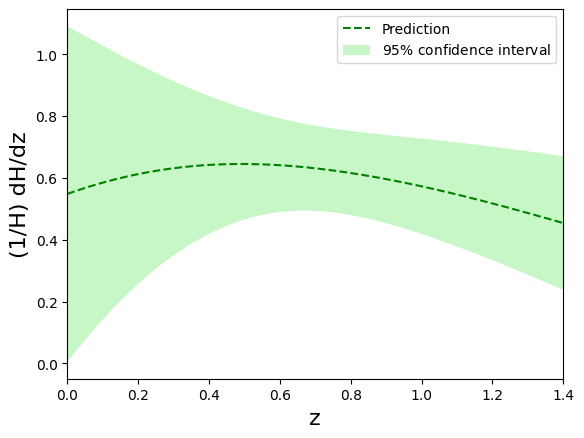

In [58]:
# baixando e nomeando dados reconstruídos de H
hz = np.genfromtxt('/content/hz_recon.dat', delimiter='\t')

z_hz = hz[:, 0]
h_hz = hz[:, 1]

ehz = hz[:, 2]

# baixando e nomeando dados reconstruídos da derivada de H
dhz = np.genfromtxt('/content/dhz_recon_newz.dat', delimiter='\t')

z_dhz = dhz[:, 0]

dh = dhz[:, 1]

edh = dhz[:, 2]

dh_h = dh / h_hz  # H'/H

sigma_H = np.sqrt(((dh_h) ** 2) * (((ehz / h_hz) ** 2) + ((edh / dh) ** 2)))


# PLOTE

plt.xlim(0,1.4)
plt.plot(z_dhz, dh_h, color='green', label='Prediction', linestyle="--")
#plt.plot(z, dh_1, color='red', label='$\Lambda$CDM')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([dh_h - 1.9600 * sigma_H,
                        (dh_h + 1.9600 * sigma_H)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('(1/H) dH/dz', fontsize=16)
plt.legend(loc='best')
plt.show()


# salvando os dados reconstruídos

dH = xi, y_pred, sigma_H
np.savetxt('dh_h_recon_newz.dat', np.transpose(dH), delimiter='\t')
#from google.colab import files
#files.download("dh_h_recon_newz.dat")

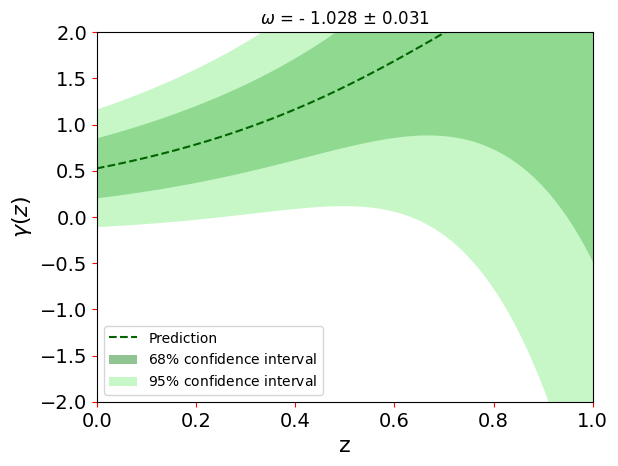

In [59]:
# definindo Om'/Om

dOm_Om = (3/(1+z_dhz)) - (2*dh_h)   #dh_h vem da reconstrução dos dados

eOm = np.sqrt( (2*sigma_H)**2 )



# reconstrução de f'/f
df_f = df / f_dgapp

sigma_ff = np.sqrt(((df_f) ** 2) * (((ef / f_dgapp) ** 2) + ((edf / df) ** 2)))



# gamma prediction

gamma_pred = df_f / dOm_Om

sigma_g = np.sqrt( (sigma_ff / dOm_Om )**2 + ( ( (df_f*eOm)/ ((dOm_Om)**2) ) )**2)



#PLOTE

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, label e título
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.legend(loc='best')
#plt.savefig('gamma_cte.pdf')
plt.title('$\omega$ = - 1.028 $\pm$ 0.031')
plt.show()

Vamos fazer um best-fit dos dados reconstruídos usando a seguinte expressão para $\gamma(z)$:

$\gamma(z) = \gamma_2 - \frac{\gamma_1}{1+z}$

0.9999999999999999
0.1417640952413507


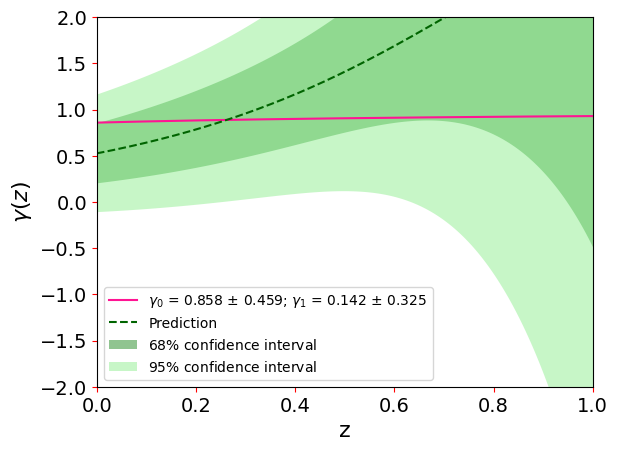

In [62]:
def g(z, g2, g1):

    cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649)

    a = 1/(1+z)

    gg = g2-g1/(1+z)

    return gg

# ajuste da função

popt, pcov = curve_fit(g, z_dhz, gamma_pred, sigma=sigma_g, p0=[0.25,-1.2], bounds=([-1.5, -1.5], [1., 1.]), method='trf')
print(popt[0])
print(popt[1])


p1 = popt[0]
p2 = popt[1]

erro = sigma_g
e1 = erro[0]
e2 = erro[1]

p_0 = p1-p2

e0 = np.sqrt( (1*e1)**2 + (1*e2)**2 )

# plote

#best-fit
zi = np.linspace(min(z_dhz), max(z_dhz), 1000)

fig, ax = plt.subplots()
plt.ylim(-2,2)
plt.xlim(0,1.0)
plt.tick_params(labelsize=14, color='red')
plt.plot(zi, g(zi, popt[0], popt[1]), color='deeppink', label=r'$\gamma_0$ = '+str(np.round(p_0, 3))+' $\pm$ '+str(np.round(e0, 3))+'; $\gamma_1$ = '+str(np.round(p2, 3))+' $\pm$ '+str(np.round(e2, 3)))


plt.plot(z_dhz, gamma_pred, color='darkgreen', label='Prediction', linestyle="--")
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.0000 * sigma_g,
                        (gamma_pred + 1.0000 * sigma_g)[::-1]]),
         alpha=.5, fc='forestgreen', ec='None', label='$68\%$ confidence interval')
plt.fill(np.concatenate([z_dhz, z_dhz[::-1]]),
         np.concatenate([gamma_pred - 1.9600 * sigma_g,
                        (gamma_pred + 1.9600 * sigma_g)[::-1]]),
         alpha=.5, fc='lightgreen', ec='None', label='$95\%$ confidence interval')

# legenda, título e eixos
plt.legend(loc='best')
plt.xlabel('z', fontsize=16)
plt.ylabel('$\gamma(z)$', fontsize=16)
plt.savefig('bestfit gamma.pdf')
plt.show()

In [64]:
# cálculo do xi2 reduzido: quanto mais próximo de 1, maior a concordância entre as distribuições observadas e esperadas

xi2 = np.sum(( (gamma_pred - g(z_dhz, *popt)) / sigma_g) ** 2)
df = len(z_dhz) - 2
print(xi2/df)

print(xi2)

0.3883181202322133
387.54148399174886


Vamos integrar numericamente a equação (10) de Linder & Cahn, dada por:

$\gamma = \frac{1}{2} + \frac{1}{4} \int_0^1 \frac{du}{u} u^{5/2} \Omega_\omega (au)$ = $\frac{1}{2} + \frac{1}{4} \int_0^1 u^{3/2} \Omega_\omega (au)  du$.

Esta equação vem de:

$\gamma \approx \frac{1}{2} + \frac{1}{4} \frac{a^{-5/2}}{\Omega_\omega (a)} \int_0^a \frac{da'}{a'} a'^{5/2} \Omega_\omega (a')$

Esta é a expressão que iremos integrar.

In [61]:
import sympy as sm
from scipy.interpolate import CubicSpline

# MODELO LCDM
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, w0 = -1, h=0.6727, sigma8=0.8120, n_s=0.9649)


a = np.linspace(0.01, 1, 1000)  # fator de escala


# omega
Om = ccl.background.omega_x(cosmo, a, 'matter')

Ow = 1 - Om

y = (a**(3/2))*Ow

t1 = 1/2
t2 = 0.25*(a**(-5/2))/Ow

fy = CubicSpline(a, y)

gamma = t1 + t2*fy.antiderivative(1)(a)

print(np.trapz(gamma, a))

0.5568187270343903
